<a href="https://colab.research.google.com/github/samer-glitch/samerelhajjhassan/blob/main/Preliminary%20Observations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files
uploaded = files.upload()

Saving psp_fees.csv to psp_fees (1).csv


In [8]:
from google.colab import files
uploaded = files.upload()

Saving PSP_Jan_Feb_2019.csv to PSP_Jan_Feb_2019 (1).csv


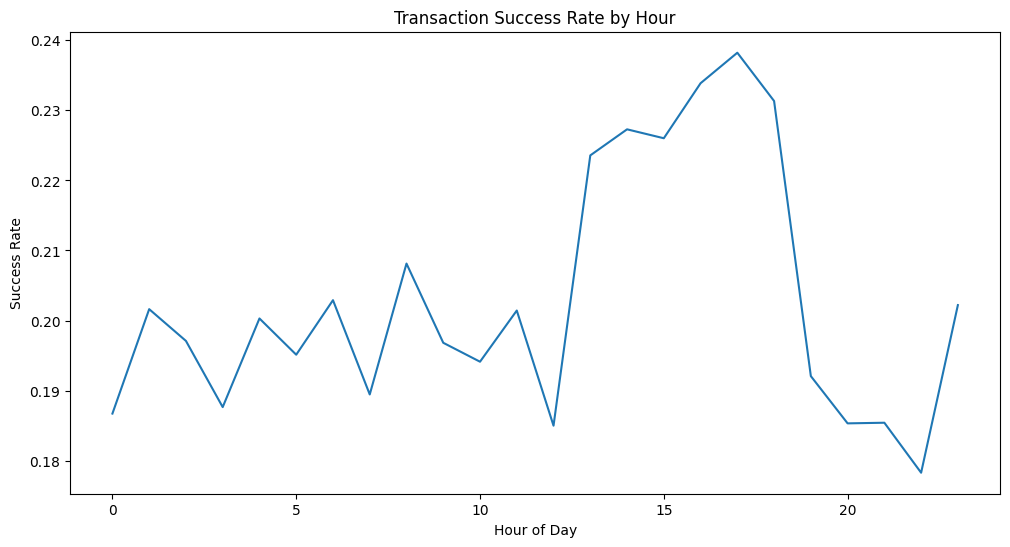

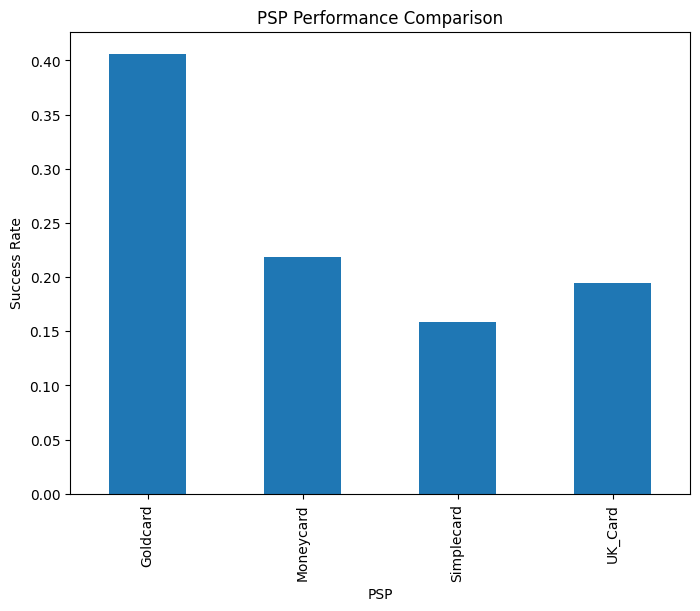

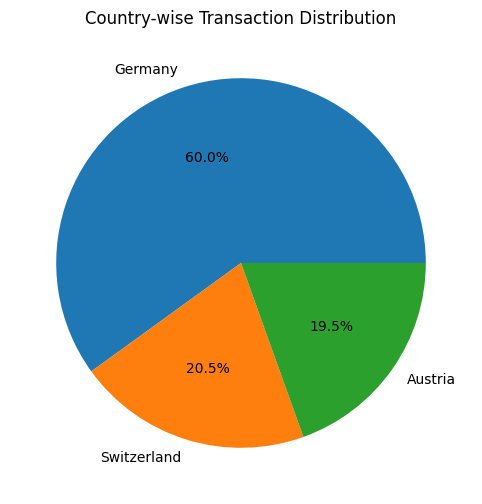

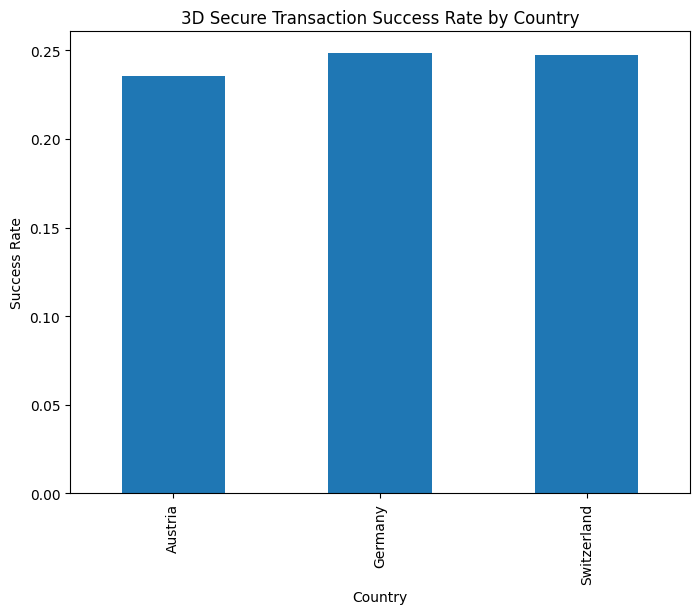

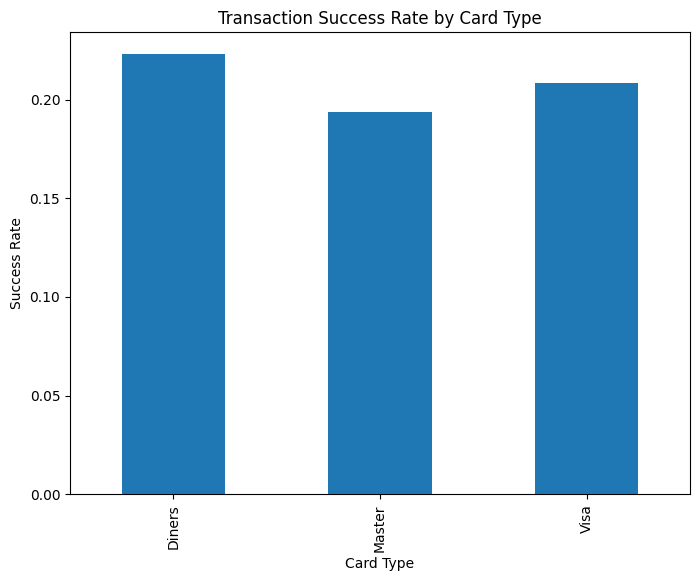

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the datasets
psp_fees_df = pd.read_csv('psp_fees.csv')
transactions_df = pd.read_csv('PSP_Jan_Feb_2019.csv')

# Convert 'tmsp' to datetime and extract hour and day
transactions_df['tmsp'] = pd.to_datetime(transactions_df['tmsp'])
transactions_df['hour'] = transactions_df['tmsp'].dt.hour
transactions_df['day'] = transactions_df['tmsp'].dt.date

# Prepare data for visualization

# 1. Transaction Success Rate by Hour/Day
hourly_success_rate = transactions_df.groupby('hour')['success'].mean()

# 2. PSP Performance Comparison
psp_success_rate = transactions_df.groupby('PSP')['success'].mean()

# 3. Country-wise Transaction Analysis
country_counts = transactions_df['country'].value_counts()

# 4. Most Secure 3D Country
secure_3d_country_success_rate = transactions_df[transactions_df['3D_secured'] == 1].groupby('country')['success'].mean()

# 5. Card Type and Transaction Success
card_success_rate = transactions_df.groupby('card')['success'].mean()

# Generate Visualizations
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_success_rate)
plt.title('Transaction Success Rate by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Success Rate')
plt.show()

plt.figure(figsize=(8, 6))
psp_success_rate.plot(kind='bar')
plt.title('PSP Performance Comparison')
plt.xlabel('PSP')
plt.ylabel('Success Rate')
plt.show()

plt.figure(figsize=(8, 6))
country_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Country-wise Transaction Distribution')
plt.ylabel('')
plt.show()

plt.figure(figsize=(8, 6))
secure_3d_country_success_rate.plot(kind='bar')
plt.title('3D Secure Transaction Success Rate by Country')
plt.xlabel('Country')
plt.ylabel('Success Rate')
plt.show()

plt.figure(figsize=(8, 6))
card_success_rate.plot(kind='bar')
plt.title('Transaction Success Rate by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Success Rate')
plt.show()




In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





missing_values_transactions = transactions_df.isnull().sum()
missing_values_psp_fees = psp_fees_df.isnull().sum()

print(missing_values_transactions)
print(missing_values_psp_fees)

Unnamed: 0    0
tmsp          0
country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
hour          0
day           0
dtype: int64
PSP                   0
PSP_Fee_Successful    0
PSP_Fee_Failed        0
dtype: int64


In [13]:
# Checking for duplicate entries in the transactions dataset
duplicates_in_transactions = transactions_df.duplicated().sum()
print(f"Number of duplicate entries in transactions dataset: {duplicates_in_transactions}")
# Checking for duplicate entries in the psp_fees_file_path dataset
duplicates_in_psp_fees = psp_fees_df.duplicated().sum()
print(f"Number of duplicate entries in transactions dataset: {duplicates_in_psp_fees}")


Number of duplicate entries in transactions dataset: 0
Number of duplicate entries in transactions dataset: 0


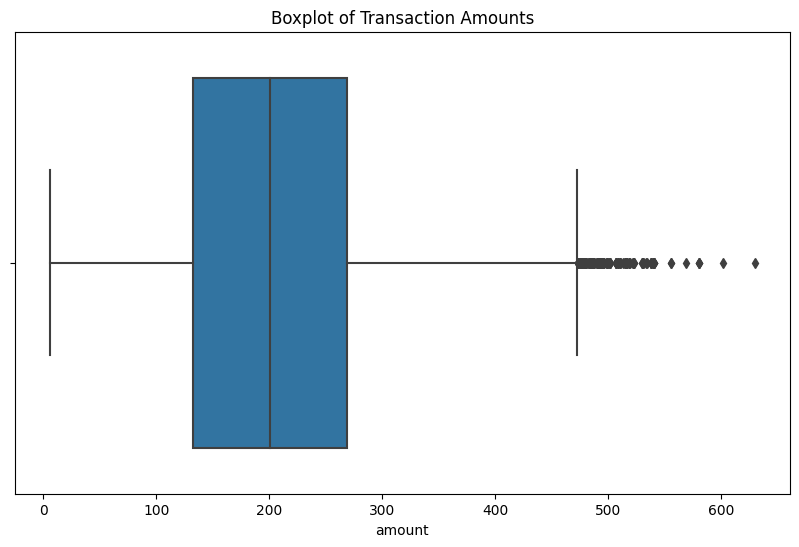

In [14]:
# Visualizing outliers in the 'amount' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=transactions_df['amount'])
plt.title("Boxplot of Transaction Amounts")
plt.show()


In [15]:
# Creating a new DataFrame for engineered features
feature_df = pd.DataFrame()

# Adding time-related features to the new DataFrame
feature_df['hour_of_day'] = transactions_df['tmsp'].dt.hour
feature_df['day_of_week'] = transactions_df['tmsp'].dt.dayofweek
feature_df['minute_of_hour'] = transactions_df['tmsp'].dt.minute

# Displaying a sample of the new feature DataFrame
print(feature_df.sample(10))


       hour_of_day  day_of_week  minute_of_hour
24554           20            1              23
20192           22            2              22
30929           10            1              30
8029            20            1              31
13652           15            1               3
28049           15            5               8
2034            16            2              24
43021           13            1              58
18614            1            1               5
29589            4            0              48


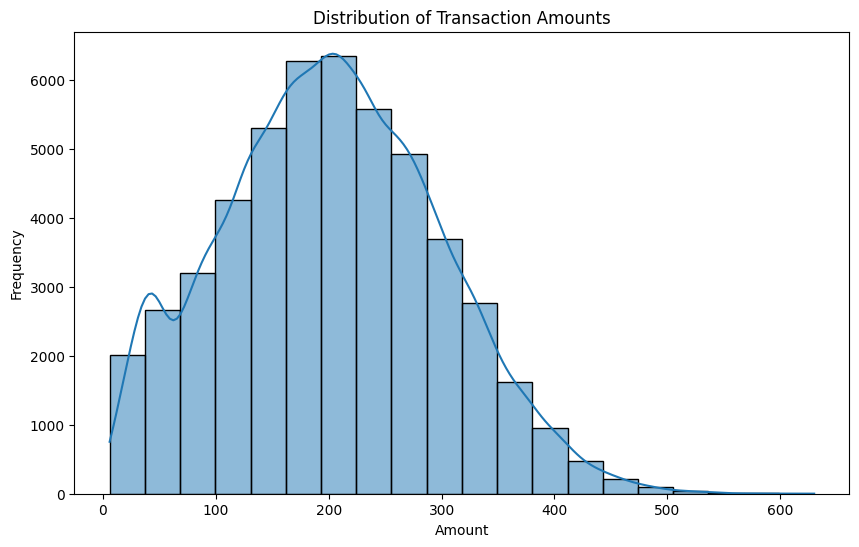

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(transactions_df['amount'], bins=20, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


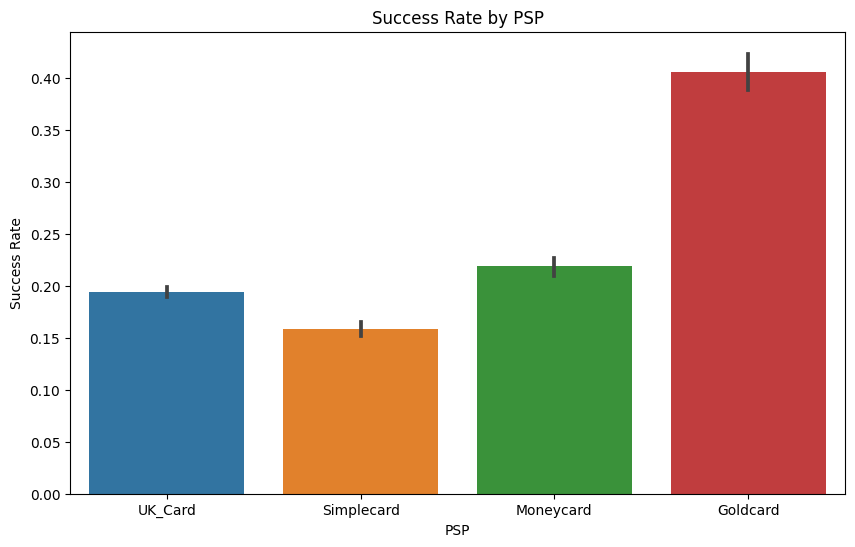

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='PSP', y='success', data=transactions_df)
plt.title("Success Rate by PSP")
plt.xlabel("PSP")
plt.ylabel("Success Rate")
plt.show()


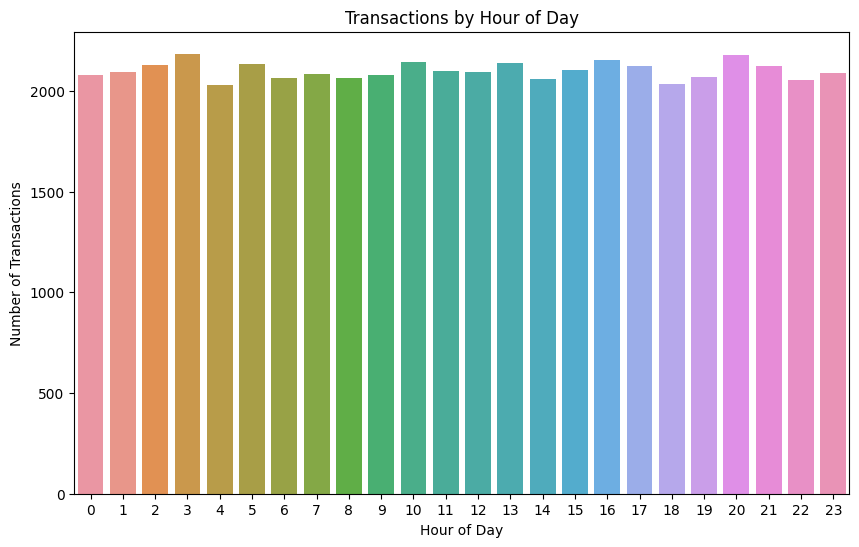

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='hour_of_day', data=feature_df)
plt.title("Transactions by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Transactions")
plt.show()


   Unnamed: 0                tmsp  country  amount  success         PSP  \
0           0 2019-01-01 00:01:11  Germany      89        0     UK_Card   
1           1 2019-01-01 00:01:17  Germany      89        1     UK_Card   
2           2 2019-01-01 00:02:49  Germany     238        0     UK_Card   
3           3 2019-01-01 00:03:13  Germany     238        1     UK_Card   
4           4 2019-01-01 00:04:33  Austria     124        0  Simplecard   

   3D_secured    card  hour         day  day_of_week  
0           0    Visa     0  2019-01-01            1  
1           0    Visa     0  2019-01-01            1  
2           1  Diners     0  2019-01-01            1  
3           1  Diners     0  2019-01-01            1  
4           0  Diners     0  2019-01-01            1  


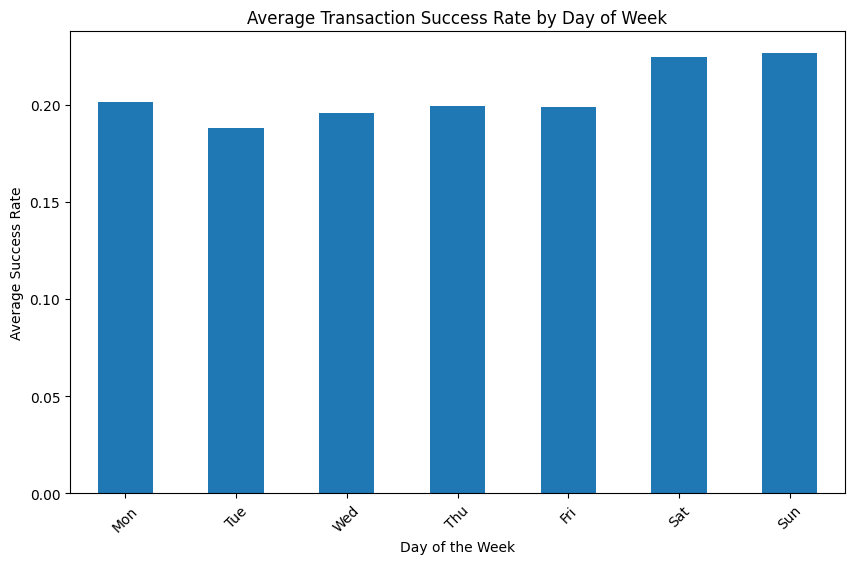

   Unnamed: 0                tmsp  country  amount  success         PSP  \
0           0 2019-01-01 00:01:11  Germany      89        0     UK_Card   
1           1 2019-01-01 00:01:17  Germany      89        1     UK_Card   
2           2 2019-01-01 00:02:49  Germany     238        0     UK_Card   
3           3 2019-01-01 00:03:13  Germany     238        1     UK_Card   
4           4 2019-01-01 00:04:33  Austria     124        0  Simplecard   

   3D_secured    card  hour         day  day_of_week  hour_of_day  
0           0    Visa     0  2019-01-01            1            0  
1           0    Visa     0  2019-01-01            1            0  
2           1  Diners     0  2019-01-01            1            0  
3           1  Diners     0  2019-01-01            1            0  
4           0  Diners     0  2019-01-01            1            0  


<ipython-input-21-fad41537077a>:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = transactions_df.corr()


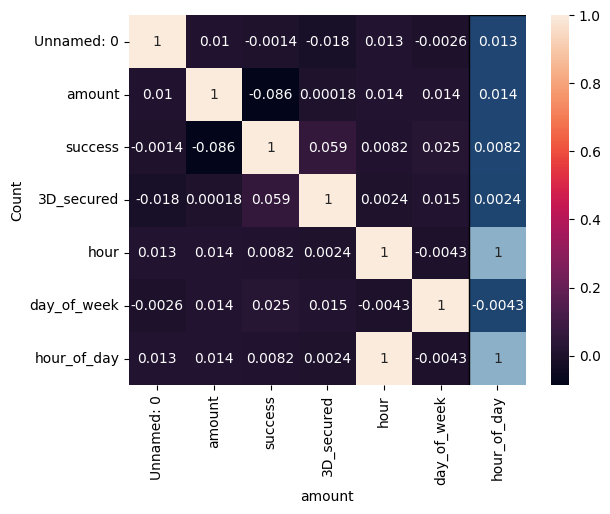

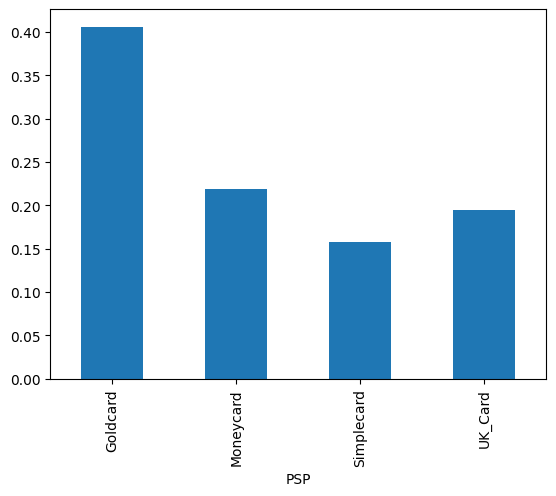

<ipython-input-21-fad41537077a>:34: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = transactions_df.corr()


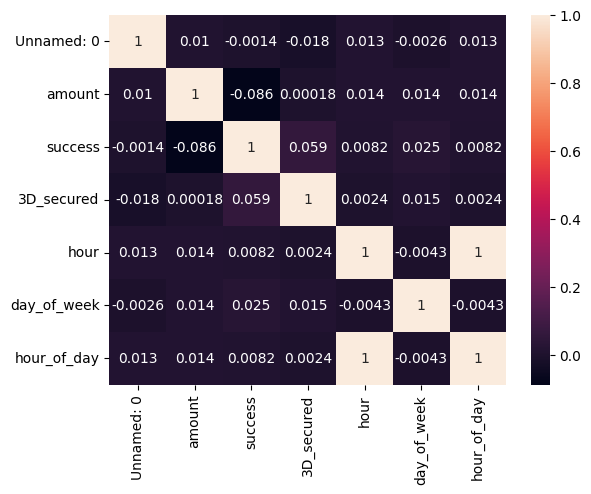

In [21]:
transactions_df['day_of_week'] = transactions_df['tmsp'].dt.dayofweek
print(transactions_df.head())

avg_success_by_day = transactions_df.groupby('day_of_week')['success'].mean()
plt.figure(figsize=(10, 6))
avg_success_by_day.plot(kind='bar')
plt.title("Average Transaction Success Rate by Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Success Rate")
plt.xticks(range(0, 7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()
# Convert 'tmsp' to datetime format if not already done
transactions_df['tmsp'] = pd.to_datetime(transactions_df['tmsp'])

# Add 'hour_of_day' to the DataFrame
transactions_df['hour_of_day'] = transactions_df['tmsp'].dt.hour

# Verify the addition
print(transactions_df.head())
# Example Python code for correlation analysis
correlation_matrix = transactions_df.corr()
sns.heatmap(correlation_matrix, annot=True)
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of transaction amounts
sns.histplot(transactions_df['amount'], kde=True)
plt.show()

# Bar chart for transaction success rates by PSP
success_rates = transactions_df.groupby('PSP')['success'].mean()
success_rates.plot(kind='bar')
plt.show()
correlation_matrix = transactions_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()